<a href="https://colab.research.google.com/github/DesireeHc/EcuacionesDiferenciales/blob/main/Copia_de_Ecuacion_de_calor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de una solución de la ecuación del calor

La solución de la ecuación
$$\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2}$$
sujeta a las condiciones de frontera:
$$u(0,t)=u(1,t)=0, \;\;\; t>0$$
Y la condición inicial:
$$u(x,0)=x,\;\;\;0<x<1$$
Esta dada en términos de la serie de Fourier por la expresión:
$$u(x,t)=\frac{2}{\pi}\sum_{n=1}^{\infty} \frac{(-1)^{n+1}}{n}  \sin(n\pi x)e^{-(n\pi)^2 t}.$$

Este problema modela la transferencia de calor en una barra ideal delgada, con $k=1$.

In [ ]:
from pylab import *

Para empezar, graficamos la condición inicial.

In [ ]:
def recta(x):
    y = zeros(len(x))
    for i in range(len(x)):
        y[i] = x[i]
    return y

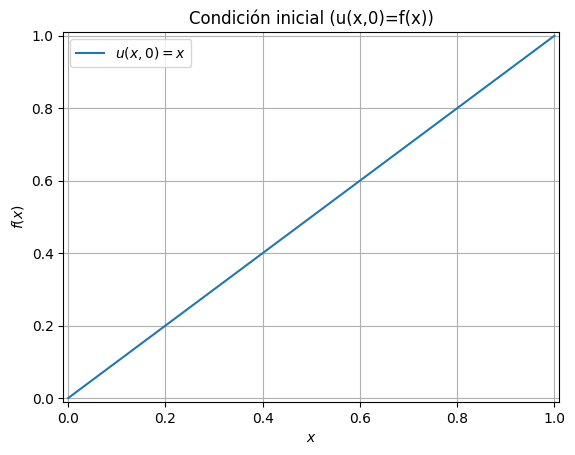

In [ ]:
x = linspace(0,1,1000)
f = recta(x)
plot(x,f,label='$u(x,0)=x$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$');
plt.title("Condición inicial (u(x,0)=f(x))")
xlim([-0.01,1.01]),ylim([-0.01,1.01]),grid(),legend()
show()

Usamos una serie de Fourier para aproximar la condición inicial $u(x,0)=f(x)=x$.

In [ ]:
def u_0(x,N=20): # N es el número de armónicos
    f = zeros(len(x))
    for n in range(1,N):
        f += (-1)**(n+1)*sin(n*pi*x)/(n)
    return (2.0/pi)*f

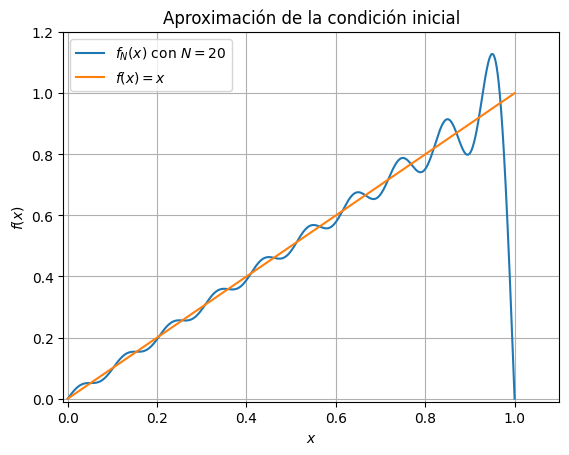

In [ ]:
f_n = u_0(x)
plot(x,f_n,label='$f_N(x)$ con $N=20$')
plot(x,f,label='$f(x)=x$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$');
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.1]),ylim([-0.01,1.2]),grid(),legend()
show()

Podemos visualizar la aproximación para diferentes cantidades de armónicos.

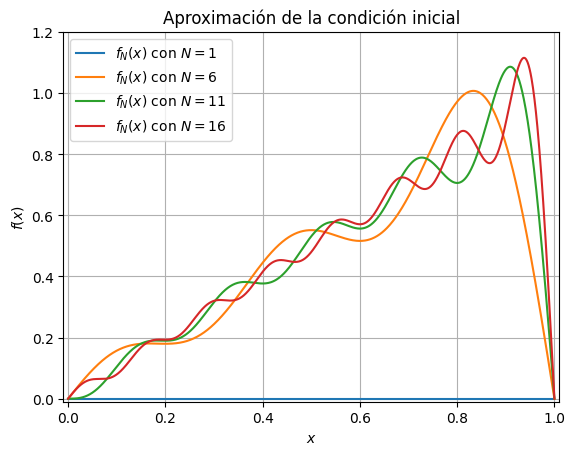

In [ ]:
for i in range(1,20,5):
    plot(x,u_0(x,i),label='$f_N(x)$ con $N=%d$' %i)
plt.xlabel('$x$'); plt.ylabel('$f(x)$');
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-0.01,1.2]),grid(),legend()
show()

Ahora, agregamos la parte temporal para visualizar la solución completa. Primero, para el momento inicial, $t=0$.

In [ ]:
def u_x_t(x,t,N=50):
    f = zeros( (len(x),len(t)) )
    for i in range(len(t)):
        for n in range(1,N):
            f[:,i] += (-1)**(n+1)*sin(n*pi*x)/(n)*exp(-n**2*pi**2*t[i])
    return (2.0/pi)*f

In [ ]:
x = linspace(0,1,1000)
t = linspace(0,10,1000)
U = u_x_t(x,t)

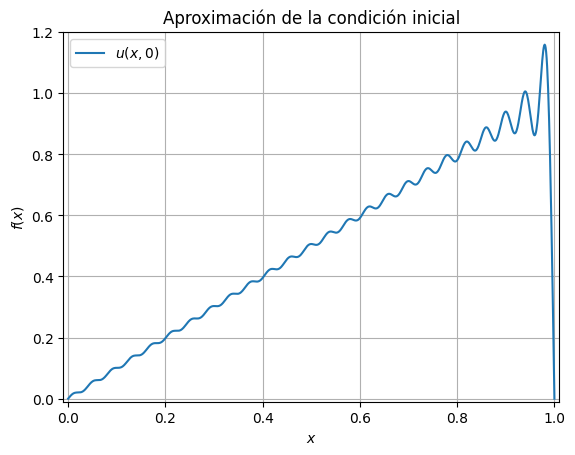

In [ ]:
plot(x,U[:,0],label='$u(x,0)$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$');
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-0.01,1.2]),grid(),legend()
show()

Luego, para diferentes tiempos, lo cual nos permite ver cómo la solución evoluciona cuando $t \to \infty$.

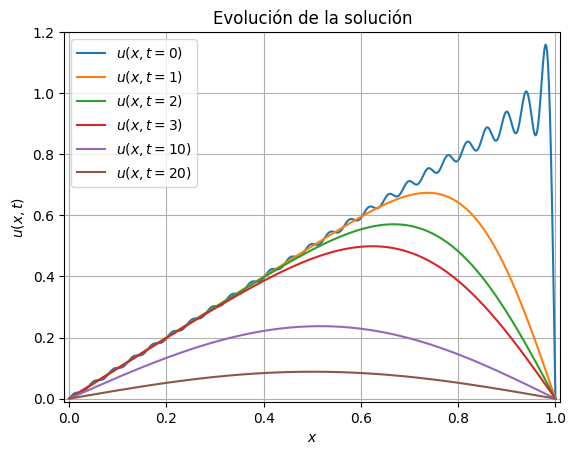

In [ ]:
plot(x,U[:,0],label='$u(x,t=0)$') # Mejorar
plot(x,U[:,1],label='$u(x,t=1)$')
plot(x,U[:,2],label='$u(x,t=2)$')
plot(x,U[:,3],label='$u(x,t=3)$')
plot(x,U[:,10],label='$u(x,t=10)$')
plot(x,U[:,20],label='$u(x,t=20)$')
plt.xlabel('$x$'); plt.ylabel('$u(x,t)$');
plt.title("Evolución de la solución")
xlim([-0.01,1.01]),ylim([-0.01,1.2]),grid(),legend()
show()

Y podemos ver esto en una gráfica en 3D.

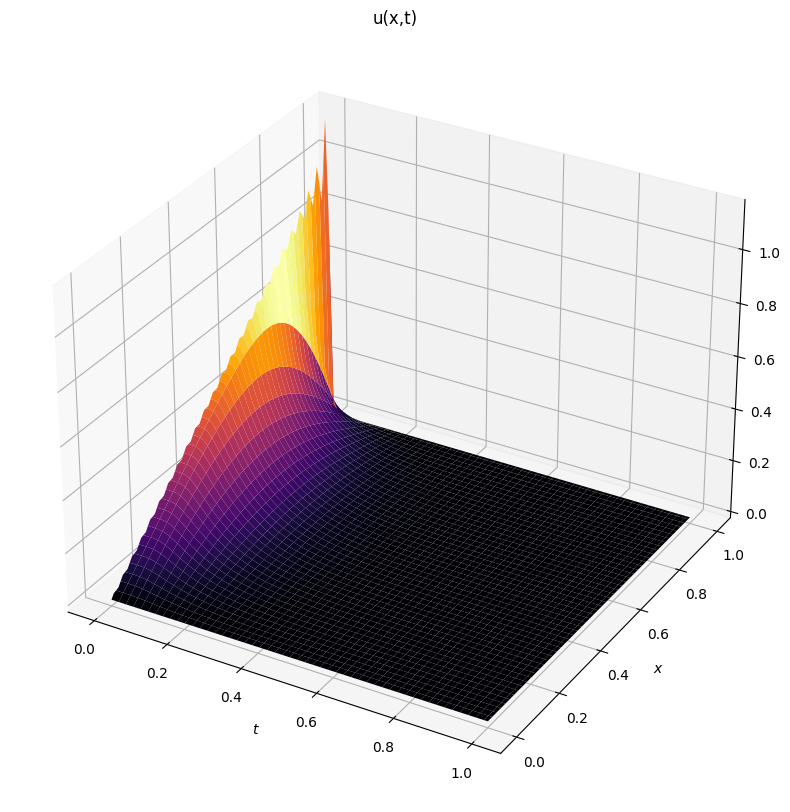

In [ ]:
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0,1.0,100)
t = linspace(0,1.0,100)

X,T = np.meshgrid(x,t)

U = u_x_t(x,t)

plt.xlabel('$t$'); plt.ylabel('$x$');
plt.title("u(x,t)")
ax.plot_surface(X, T, U, cmap="inferno"); #Otros colores:"viridis", "inferno", "plasma"

# Ejercicios
### a) $f(x)=sin(2πx)−3sin(6πx)$
Condición inicial

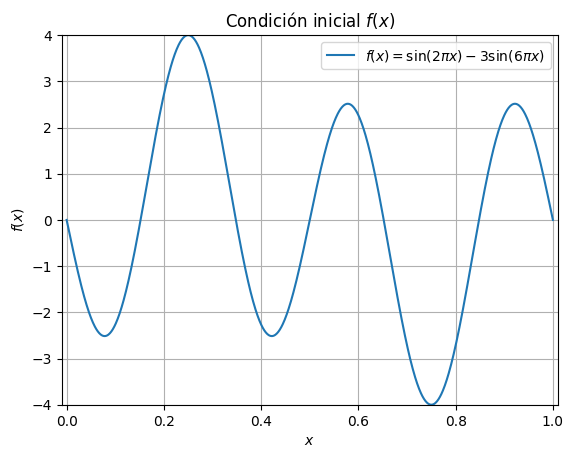

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos los puntos x
x = np.linspace(0, 1, 1000)

# Definimos la condición inicial f(x) = sin(2πx) - 3sin(6πx)
def f_x(x):
    return np.sin(2 * np.pi * x) - 3 * np.sin(6 * np.pi * x)

# Graficamos la condición inicial
plt.plot(x, f_x(x), label='$f(x) = \sin(2\pi x) - 3\sin(6\pi x)$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$')
plt.title("Condición inicial $f(x)$")
plt.xlim([-0.01, 1.01])
plt.ylim([-4, 4])
plt.grid(True)
plt.legend()
plt.show()


Solución general
$u(x,t)$ usando separación de variables

 Se muestra cómo la solución se atenúa conforme
𝑡
t aumenta.

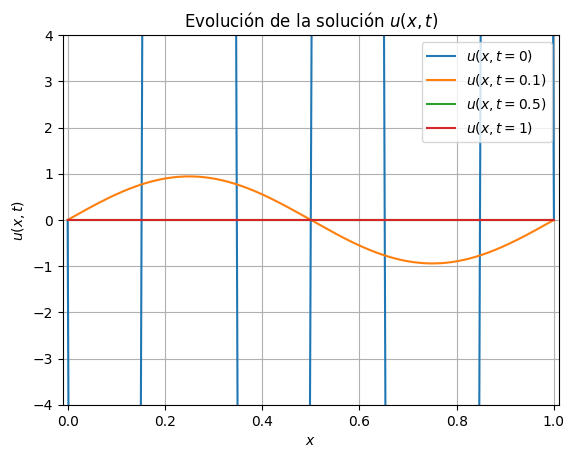

In [ ]:
# Definimos la función u(x,t) como una serie (utilizamos series de Fourier)
def u_x_t(x, t, N=50):
    f = np.zeros((len(x), len(t)))
    for i in range(len(t)):
        for n in range(1, N):
            # Sumamos los armónicos de la solución general
            f[:,i] += (np.sin(2 * np.pi * x) * np.exp(-4 * np.pi**2 * t[i])
                      - 3 * np.sin(6 * np.pi * x) * np.exp(-36 * np.pi**2 * t[i]))
    return f

# Definimos los valores de tiempo
t = np.linspace(0, 1, 1000)

# Calculamos la solución u(x,t)
U = u_x_t(x, t)

# Graficamos la evolución para diferentes tiempos
plt.plot(x, U[:, 0], label='$u(x, t=0)$')
plt.plot(x, U[:, 100], label='$u(x, t=0.1)$')
plt.plot(x, U[:, 500], label='$u(x, t=0.5)$')
plt.plot(x, U[:, 999], label='$u(x, t=1)$')

plt.xlabel('$x$'); plt.ylabel('$u(x,t)$')
plt.title("Evolución de la solución $u(x,t)$")
plt.xlim([-0.01, 1.01])
plt.ylim([-4, 4])
plt.grid(True)
plt.legend()
plt.show()


Representación en 3D de

u(x,t)

Se representa la solución
𝑢
(
𝑥
,
𝑡
)
u(x,t) en tres dimensiones, mostrando claramente la disipación del calor (u) a medida que avanza el tiempo.

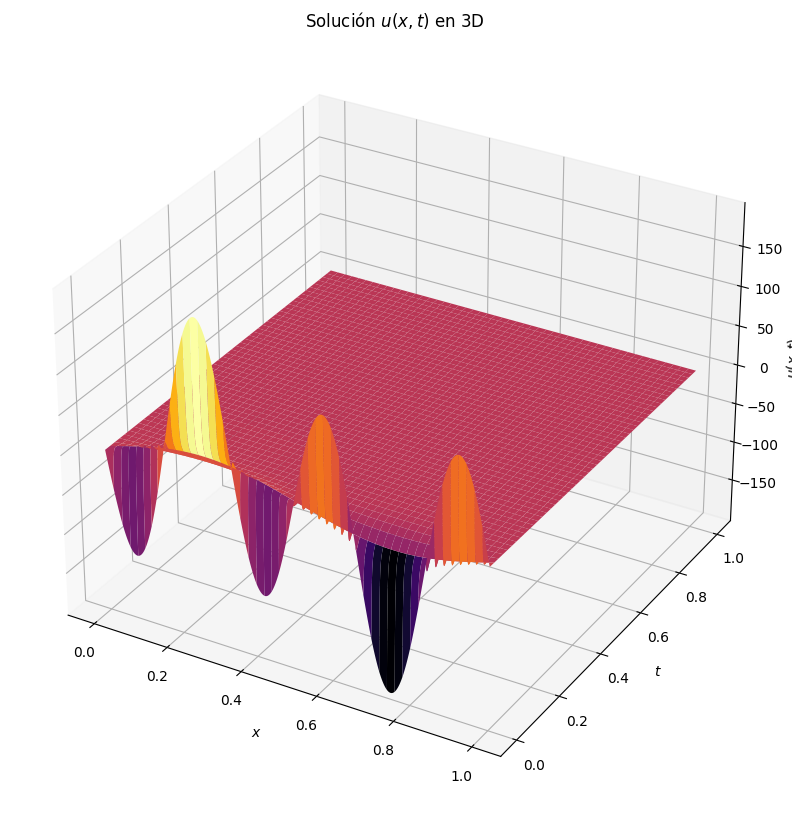

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Definimos la malla de puntos para x y t
X, T = np.meshgrid(x, t)

# Creamos la figura 3D
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

# Graficamos la superficie de u(x,t)
ax.plot_surface(X, T, U.T, cmap="inferno")

plt.xlabel('$x$'); plt.ylabel('$t$')
ax.set_zlabel('$u(x,t)$')
plt.title("Solución $u(x,t)$ en 3D")
plt.show()


### b)
 $f(x)=-2$

Función y Condiciones Iniciales

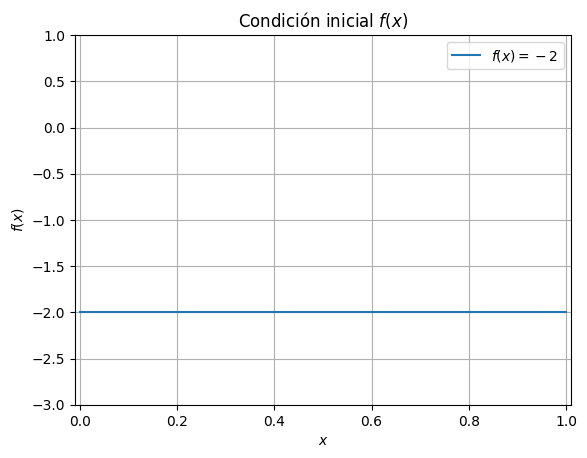

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos los puntos x
x = np.linspace(0, 1, 1000)

# Definimos la condición inicial f(x) = -2
def f_x(x):
    return -2 * np.ones_like(x)  # Retorna un array de -2 del mismo tamaño que x

# Graficamos la condición inicial
plt.plot(x, f_x(x), label='$f(x) = -2$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$')
plt.title("Condición inicial $f(x)$")
plt.xlim([-0.01, 1.01])
plt.ylim([-3, 1])
plt.grid(True)
plt.legend()
plt.show()



Solución General

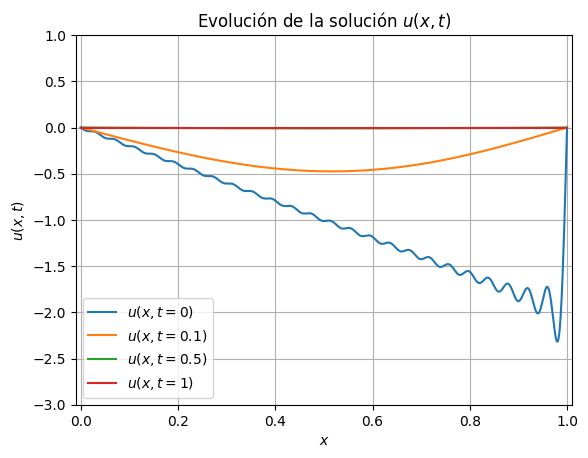

In [ ]:
# Definimos la función u(x,t) como una serie
def u_x_t(x, t, N=50):
    f = np.zeros((len(x), len(t)))
    for i in range(len(t)):
        for n in range(1, N):
            # Coeficiente de Fourier para la función constante -2
            a_n = (4 / (n * np.pi)) * (-1)**n  # Coeficientes para f(x) = -2
            # Sumamos los armónicos de la solución general
            f[:, i] += a_n * np.sin(n * np.pi * x) * np.exp(-n**2 * np.pi**2 * t[i])
    return f

# Definimos los valores de tiempo
t = np.linspace(0, 1, 1000)

# Calculamos la solución u(x,t)
U = u_x_t(x, t)

# Graficamos la evolución para diferentes tiempos
plt.plot(x, U[:, 0], label='$u(x, t=0)$')
plt.plot(x, U[:, 100], label='$u(x, t=0.1)$')
plt.plot(x, U[:, 500], label='$u(x, t=0.5)$')
plt.plot(x, U[:, 999], label='$u(x, t=1)$')

plt.xlabel('$x$'); plt.ylabel('$u(x,t)$')
plt.title("Evolución de la solución $u(x,t)$")
plt.xlim([-0.01, 1.01])
plt.ylim([-3, 1])
plt.grid(True)
plt.legend()
plt.show()


Visualización en 3D

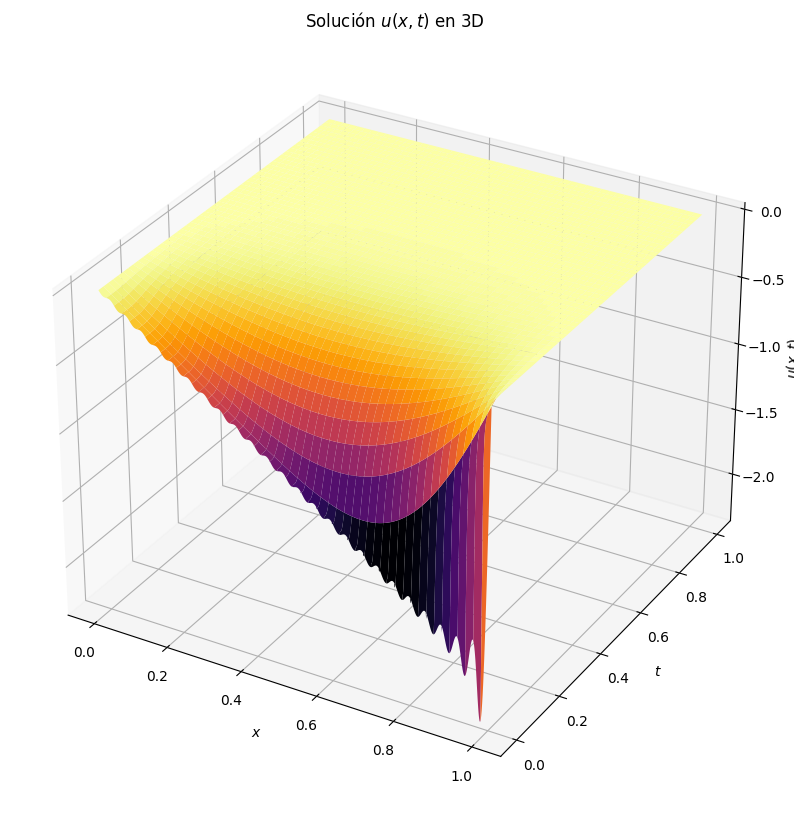

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Definimos la malla de puntos para x y t
X, T = np.meshgrid(x, t)

# Creamos la figura 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection="3d")

# Graficamos la superficie de u(x,t)
ax.plot_surface(X, T, U.T, cmap="inferno")

plt.xlabel('$x$'); plt.ylabel('$t$')
ax.set_zlabel('$u(x,t)$')
plt.title("Solución $u(x,t)$ en 3D")
plt.show()


c) $f(x)=2x+1$

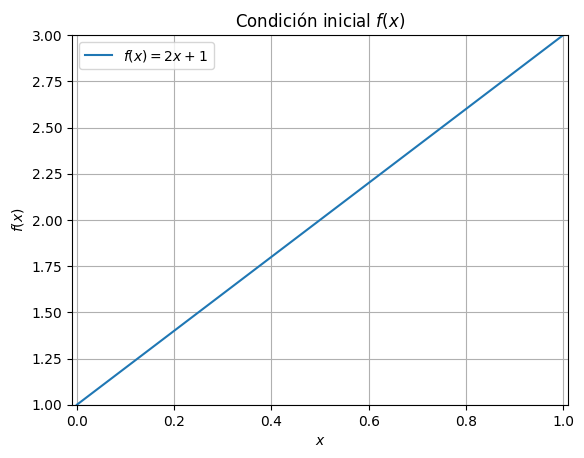

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos los puntos x
x = np.linspace(0, 1, 1000)

# Definimos la condición inicial f(x) = 2x + 1
def f_x(x):
    return 2 * x + 1  # Retorna el valor de la función

# Graficamos la condición inicial
plt.plot(x, f_x(x), label='$f(x) = 2x + 1$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$')
plt.title("Condición inicial $f(x)$")
plt.xlim([-0.01, 1.01])
plt.ylim([1, 3])
plt.grid(True)
plt.legend()
plt.show()


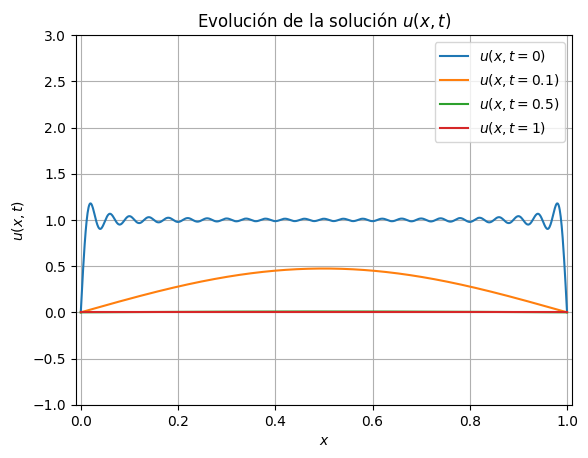

In [ ]:
# Definimos la función u(x,t) como una serie
def u_x_t(x, t, N=50):
    f = np.zeros((len(x), len(t)))
    for i in range(len(t)):
        for n in range(1, N):
            # Coeficiente de Fourier para la función 2x + 1
            a_n = (2 / (n * np.pi)) * (1 - (-1)**n)  # Coeficientes para f(x) = 2x + 1
            # Sumamos los armónicos de la solución general
            f[:, i] += a_n * np.sin(n * np.pi * x) * np.exp(-n**2 * np.pi**2 * t[i])
    return f

# Definimos los valores de tiempo
t = np.linspace(0, 1, 1000)

# Calculamos la solución u(x,t)
U = u_x_t(x, t)

# Graficamos la evolución para diferentes tiempos
plt.plot(x, U[:, 0], label='$u(x, t=0)$')
plt.plot(x, U[:, 100], label='$u(x, t=0.1)$')
plt.plot(x, U[:, 500], label='$u(x, t=0.5)$')
plt.plot(x, U[:, 999], label='$u(x, t=1)$')

plt.xlabel('$x$'); plt.ylabel('$u(x,t)$')
plt.title("Evolución de la solución $u(x,t)$")
plt.xlim([-0.01, 1.01])
plt.ylim([-1, 3])
plt.grid(True)
plt.legend()
plt.show()


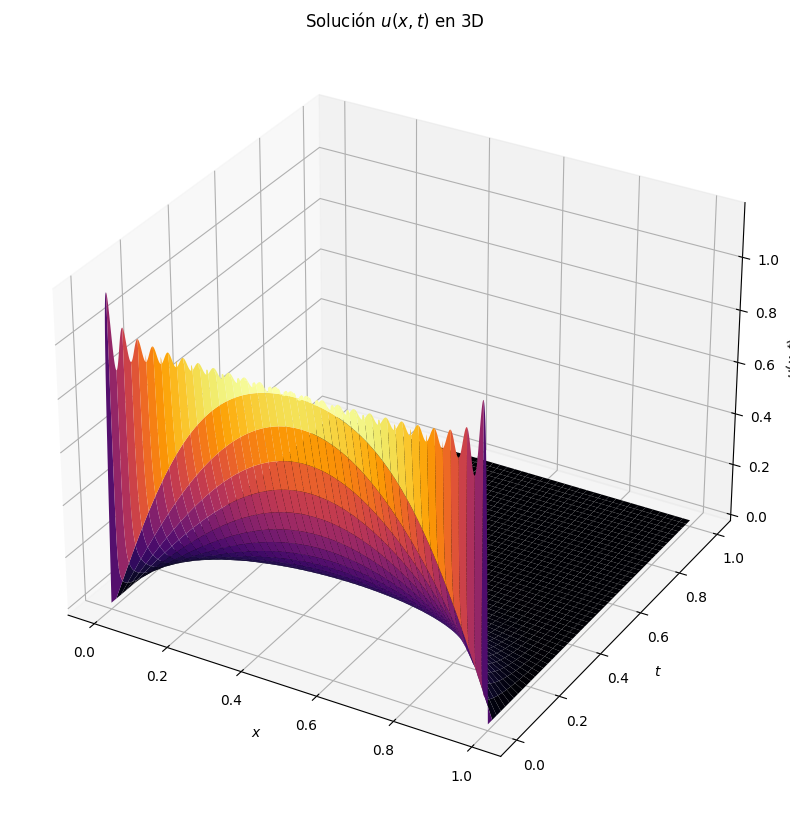

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Definimos la malla de puntos para x y t
X, T = np.meshgrid(x, t)

# Creamos la figura 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection="3d")

# Graficamos la superficie de u(x,t)
ax.plot_surface(X, T, U.T, cmap="inferno")

plt.xlabel('$x$'); plt.ylabel('$t$')
ax.set_zlabel('$u(x,t)$')
plt.title("Solución $u(x,t)$ en 3D")
plt.show()


El problema a resolver es la ecuación de calor unidimensional:

$$\frac{∂𝑢(𝑥,𝑡)}{∂𝑡}=\frac{∂^2𝑢(𝑥,𝑡)}{∂𝑥^2∂t}$$


con las siguientes condiciones:

* Condiciones de frontera:

$u(0,t)=0$ (condición en x=0)

$u(1,t)=0$ (condición en x=1)
* Condición inicial:
$u(x,0)=f(x)$

donde la función
$f(x)$ está definida como:


$$f(x)={
x  0<x≤ \frac{1}{2}
0  \frac{1}{2} <x<1$$



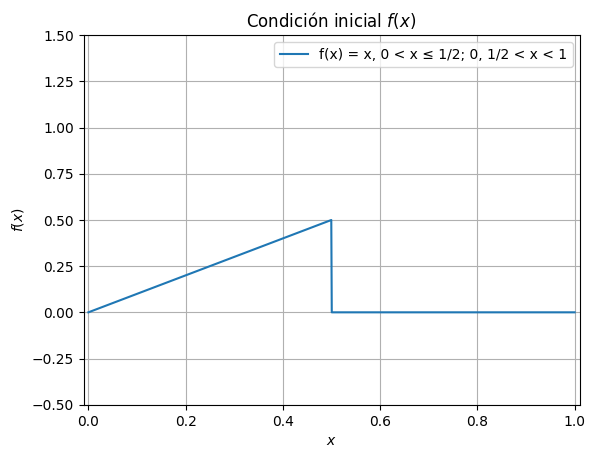

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos los puntos x en el intervalo [0, 1]
x = np.linspace(0, 1, 1000)

# Definimos la condición inicial f(x) por partes
def f_x(x):
    return np.where(x <= 0.5, x, 0)  # x para 0 < x ≤ 1/2 y 0 para 1/2 < x < 1

# Graficamos la condición inicial
plt.plot(x, f_x(x), label='f(x) = x, 0 < x ≤ 1/2; 0, 1/2 < x < 1')
plt.xlabel('$x$');  plt.ylabel('$f(x)$') #eje x y y
plt.title("Condición inicial $f(x)$") #
plt.xlim([-0.01, 1.01])
plt.ylim([-0.5, 1.5])
plt.grid(True)
plt.legend()
plt.show()




Se define la función u_x_t que calcula la solución
u(x,t) como una suma de términos de la serie de Fourier.

Se calcula la evolución de la solución en función del tiempo y se grafica para varios tiempos.

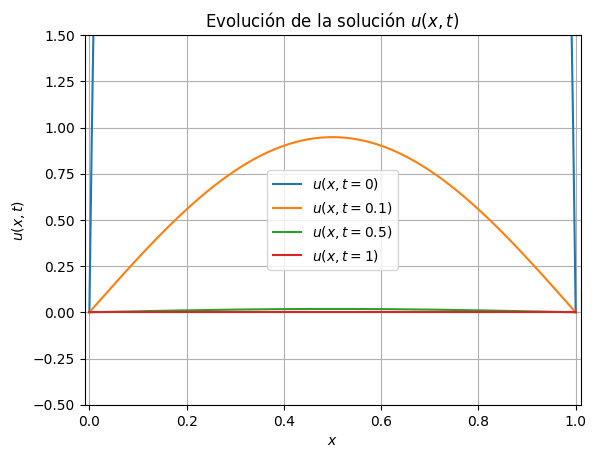

In [ ]:
# Definimos la función u(x,t) como una serie
def u_x_t(x, t, N=50):
    f = np.zeros((len(x), len(t)))
    for i in range(len(t)):
        for n in range(1, N):
            # Coeficiente de Fourier para la función por tramos
            if n % 2 == 0:  # Solo considerar los términos impares
                continue
            a_n = (4 / (n * np.pi)) * (1 - (-1)**n)  # Coeficientes para f(x)
            # Sumamos los armónicos de la solución general
            f[:, i] += a_n * np.sin(n * np.pi * x) * np.exp(-n**2 * np.pi**2 * t[i])
    return f

# Definimos los valores de tiempo
t = np.linspace(0, 1, 1000)

# Calculamos la solución u(x,t)
U = u_x_t(x, t)

# Graficamos la evolución para diferentes tiempos
plt.plot(x, U[:, 0], label='$u(x, t=0)$')
plt.plot(x, U[:, 100], label='$u(x, t=0.1)$')
plt.plot(x, U[:, 500], label='$u(x, t=0.5)$')
plt.plot(x, U[:, 999], label='$u(x, t=1)$')

plt.xlabel('$x$'); plt.ylabel('$u(x,t)$')
plt.title("Evolución de la solución $u(x,t)$")
plt.xlim([-0.01, 1.01])
plt.ylim([-0.5, 1.5])
plt.grid(True)
plt.legend()
plt.show()


Visualización en 3D:

Se crea una malla de puntos para
x y
t y se grafica la superficie de
u(x,t) en 3D.

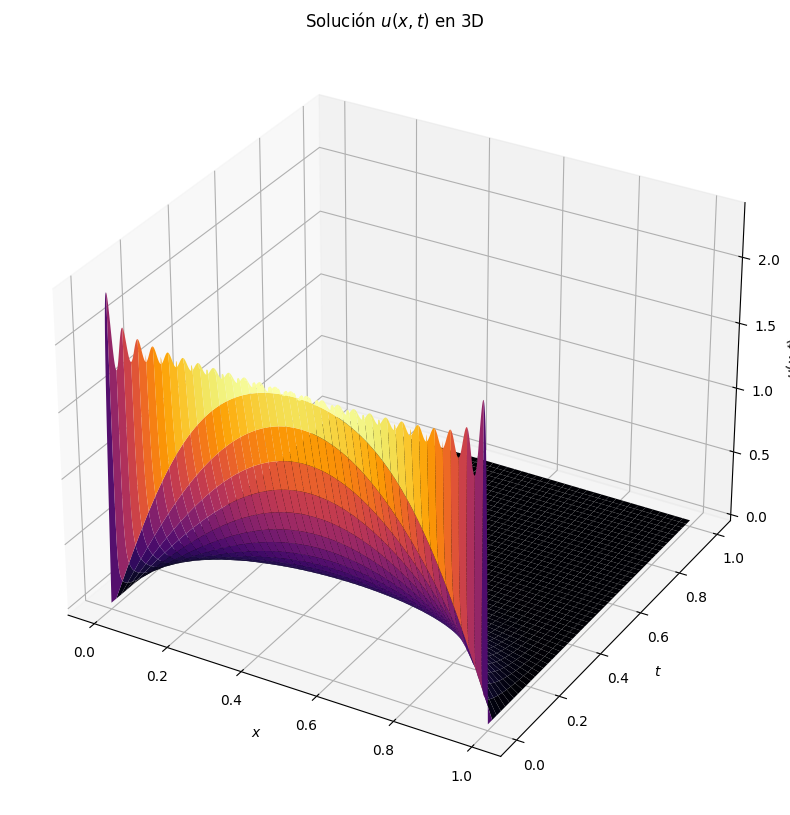

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Definimos la malla de puntos para x y t
X, T = np.meshgrid(x, t)

# Creamos la figura 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection="3d")

# Graficamos la superficie de u(x,t)
ax.plot_surface(X, T, U.T, cmap="inferno")

plt.xlabel('$x$'); plt.ylabel('$t$')
ax.set_zlabel('$u(x,t)$')
plt.title("Solución $u(x,t)$ en 3D")
plt.show()
